In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df= pd.read_csv(r'D:\SQL EXCEL\data_jobs.csv')
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [4]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [6]:
df_salary =df[pd.notna(df['salary_year_avg'])]

In [7]:
def project_salary(salary):
    return salary * 1.03

df_salary['salary_inflated'] = project_salary(df_salary['salary_year_avg'])

C:\Users\speedlink\AppData\Local\Temp\ipykernel_9848\931031152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['salary_inflated'] = project_salary(df_salary['salary_year_avg'])


In [8]:
df_salary['salary_year_avg'].apply(project_salary)

28        112785.00
77        144200.00
92        123600.00
100       235068.66
109        91670.00
            ...    
785624    143392.48
785641    154500.00
785648    228531.25
785682    162225.00
785692    162225.00
Name: salary_year_avg, Length: 22003, dtype: float64

In [10]:
df_salary[['salary_year_avg','salary_inflated']]

,salary_year_avg,salary_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [12]:
df_salary['salary_inflated'] = df['salary_year_avg'].apply(lambda salary :salary * 1.03 )

C:\Users\speedlink\AppData\Local\Temp\ipykernel_9848\3030537303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['salary_inflated'] = df['salary_year_avg'].apply(lambda salary :salary * 1.03 )


In [13]:
import ast

type(ast.literal_eval(df['job_skills'][28]))

list

In [9]:
def fun_list(list):
    if pd.notna(list):
        return ast.literal_eval(list)

df_salary['job_skills'] = df_salary['job_skills'].apply(fun_list)

C:\Users\speedlink\AppData\Local\Temp\ipykernel_3452\1380215070.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['job_skills'] = df_salary['job_skills'].apply(fun_list)


In [10]:
df_salary['job_skills'][28]

['gdpr', 'excel']

In [14]:
df_salary['job_skills'] = df_salary['job_skills'].apply(lambda alter :  ast.literal_eval(alter) if pd.notna(alter) else alter)

C:\Users\speedlink\AppData\Local\Temp\ipykernel_9848\1006658536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['job_skills'] = df_salary['job_skills'].apply(lambda alter :  ast.literal_eval(alter) if pd.notna(alter) else alter)


In [15]:
df_salary['job_skills']

28                                            [gdpr, excel]
77        [mongodb, mongodb, python, r, sql, mysql, mari...
92                                            [sql, python]
100                               [sql, r, python, express]
109                           [python, r, alteryx, tableau]
                                ...                        
785624    [go, python, r, sql, oracle, windows, alteryx,...
785641                                                  NaN
785648                    [python, azure, snowflake, spark]
785682         [python, hadoop, spark, airflow, kubernetes]
785692                                  [python, matlab, r]
Name: job_skills, Length: 22003, dtype: object

In [16]:
def projected_salary(salary):
    if 'Senior' in salary['job_title_short']:
        return salary['salary_year_avg'] * 1.05
    else:
        return salary['salary_year_avg'] * 1.03



df_salary['salary_inflated'] = df_salary.apply(projected_salary , axis = 1)

df_salary[['job_title_short','salary_year_avg','salary_inflated']]

C:\Users\speedlink\AppData\Local\Temp\ipykernel_9848\2625809551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['salary_inflated'] = df_salary.apply(projected_salary , axis = 1)


,job_title_short,salary_year_avg,salary_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


In [17]:
df_salary['salary_inflated'] = df.apply(lambda x : 1.05 * x['salary_year_avg'] if 'Senior' in x['job_title_short'] else 1.03 * x['salary_year_avg'],axis=1)

df_salary[['job_title_short','salary_year_avg','salary_inflated']]



C:\Users\speedlink\AppData\Local\Temp\ipykernel_9848\931659039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary['salary_inflated'] = df.apply(lambda x : 1.05 * x['salary_year_avg'] if 'Senior' in x['job_title_short'] else 1.03 * x['salary_year_avg'],axis=1)


,job_title_short,salary_year_avg,salary_inflated
28,Data Scientist,109500.0,112785.00
77,Data Engineer,140000.0,144200.00
92,Data Engineer,120000.0,123600.00
100,Data Scientist,228222.0,235068.66
109,Data Analyst,89000.0,91670.00
...,...,...,...
785624,Data Engineer,139216.0,143392.48
785641,Data Engineer,150000.0,154500.00
785648,Data Scientist,221875.0,228531.25
785682,Data Scientist,157500.0,162225.00


In [18]:
ex_df = {
    'job_title_short':['data_scientist','data_analyst','data_engineer'],
    'job_skill':[['python','SQL'],['tableau','Excel','python'],['SQL','Python','ecxel']]
}

In [23]:
ex_df = pd.DataFrame(ex_df)

,job_title_short,job_skill
0,data_scientist,"[python, SQL]"
1,data_analyst,"[tableau, Excel, python]"
2,data_engineer,"[SQL, Python, ecxel]"


In [27]:
ex_df.explode('job_skill').value_counts()

job_title_short  job_skill
data_analyst     Excel        1
                 python       1
                 tableau      1
data_engineer    Python       1
                 SQL          1
                 ecxel        1
data_scientist   SQL          1
                 python       1
Name: count, dtype: int64

In [32]:
explode_plot = df_salary['job_skills'].explode().value_counts().head(10)

<Axes: xlabel='job_skills'>

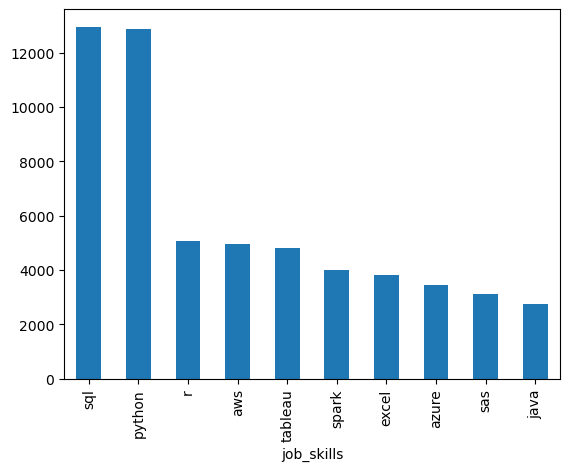

In [33]:
explode_plot.plot(kind='bar')